In [1]:
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from data.paths.parquet_paths import REVIEW

In [2]:
review_df = pd.read_parquet(str(REVIEW))
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float32
 4   date         100000 non-null  object 
 5   text         100000 non-null  object 
 6   useful       100000 non-null  int32  
 7   funny        100000 non-null  int32  
 8   cool         100000 non-null  int32  
dtypes: float32(1), int32(3), object(5)
memory usage: 5.3+ MB


In [3]:
review_df['review_id'].is_unique
review_df = review_df.set_index('review_id')

In [4]:
review_df['date'] = pd.to_datetime(review_df['date'])

In [5]:
review_df.describe()

,stars,useful,funny,cool
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.753110,1.093340,0.368510,0.449590
std,1.433861,2.323317,1.326691,1.415605
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,98.000000,75.000000,93.000000


### Variables - helpers

In [6]:
review_id = 'review_id'
user_id = 'user_id'
business_id = 'business_id'
stars = 'stars'
useful = 'useful'
funny = 'funny'
cool = 'cool'
text = 'text'
date = 'date'

In [7]:
review_df.sample(1)

,user_id,business_id,stars,date,text,useful,funny,cool
review_id,,,,,,,,
mgI2d8zmaFgepnYxReM2wQ,2yAjvQtvequOYLOX4FleVQ,GQxpWDw3MuCwAMV9BA-62w,5.0,2013-06-02,Great gyros. Kids loved them. Meat was big fla...,0,0,0


In [8]:
review_df['text_len'] = review_df['text'].apply(len)

In [9]:
review_df['text_len'].describe()

count    100000.000000
mean        573.792500
std         536.540267
min           1.000000
25%         229.000000
50%         405.000000
75%         729.000000
max        5000.000000
Name: text_len, dtype: float64

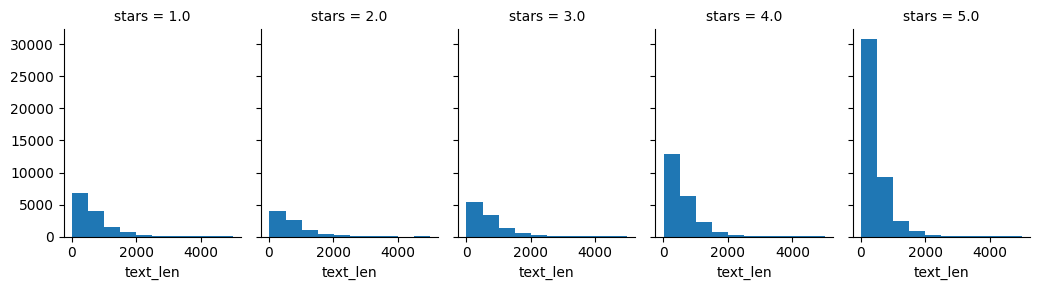

In [30]:

g = sns.FacetGrid(review_df,col='stars', height=3, aspect=.7)
g.map(plt.hist,'text_len')
plt.show()


In [11]:
review_count_by_date_df = review_df.sort_values(date).groupby(date).size().reset_index(name='review_count')
review_count_by_date_df

,date,review_count
0,2005-01-24,1
1,2005-03-03,1
2,2005-03-04,1
3,2005-03-10,1
4,2005-03-11,1
...,...,...
2081,2018-09-29,13
2082,2018-09-30,1
2083,2018-10-01,1
2084,2018-10-03,30


In [12]:
review_count_by_date_df.shape # (2086, 2)

(2086, 2)

In [13]:
review_count_by_date_df['date_bin'] = pd.cut(review_count_by_date_df['date'], 40)

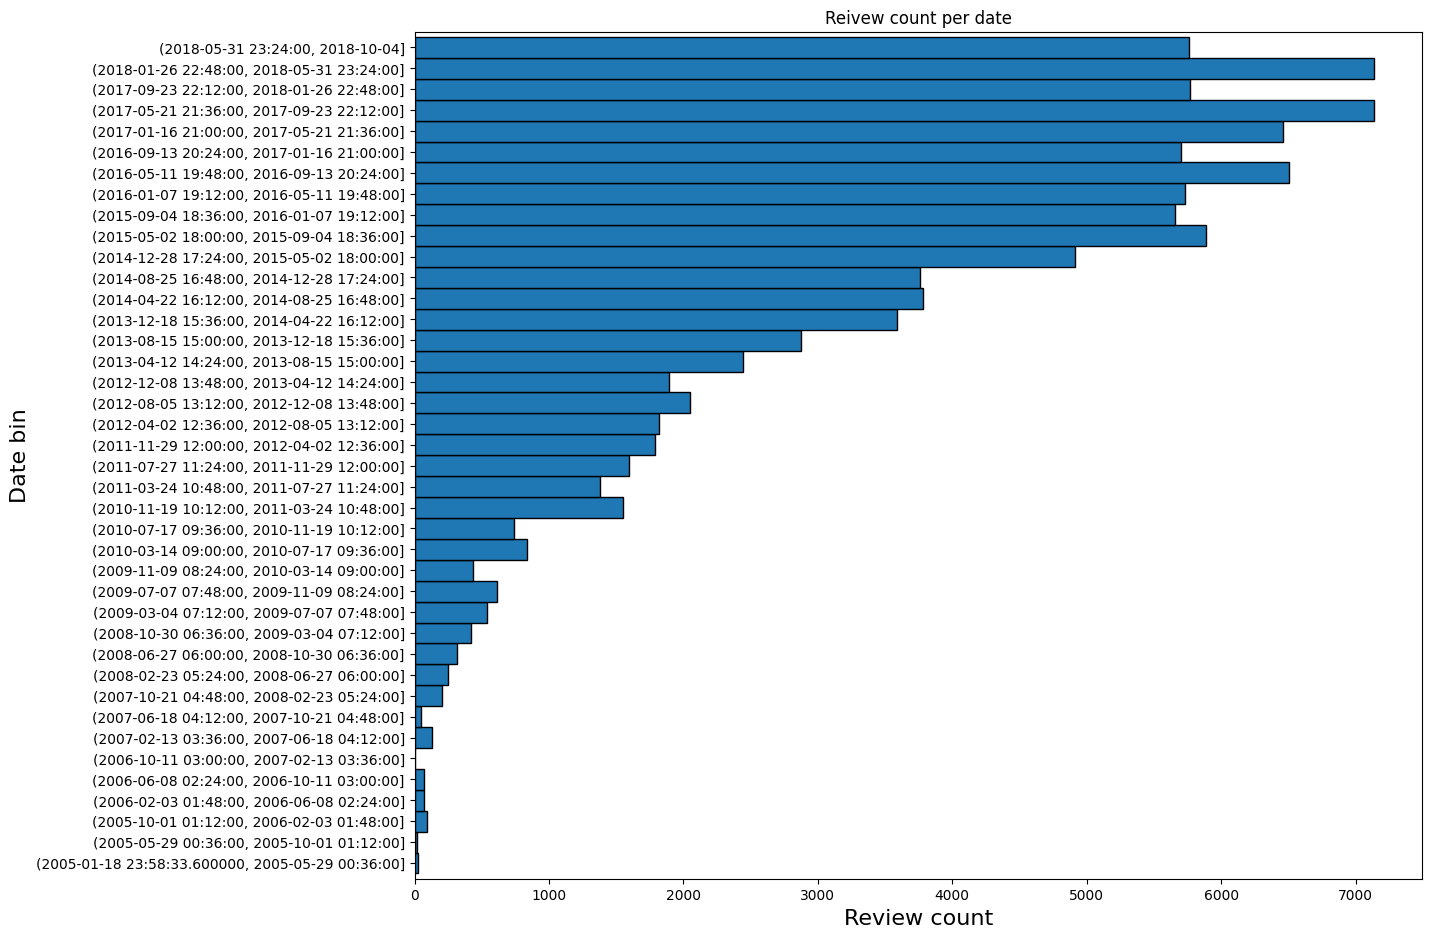

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(13, 11))
review_count_by_date_df.groupby('date_bin')['review_count'].sum().plot(kind='barh', width=1, edgecolor='black')
ax.set_title('Reivew count per date')
ax.set_xlabel('Review count', fontsize=16)
ax.set_ylabel('Date bin', fontsize=16)
plt.show()

C:\Users\fedos\AppData\Local\Temp\ipykernel_19276\1801698456.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stars_corr = review_df.groupby('stars').mean().corr(numeric_only=True)


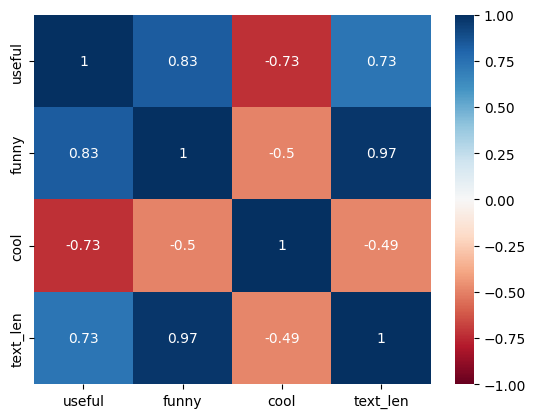

In [49]:
stars_corr = review_df.groupby('stars').mean().corr(numeric_only=True)

sns.heatmap(stars_corr, annot=True, vmin=-1.0, vmax=1.0, center=.0, cmap="RdBu")
plt.show()